## SETUP

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from print import pprint

ModuleNotFoundError: No module named 'print'

In [ ]:
import pandas as pd

# Reload the data using 'on_bad_lines' to skip bad lines
file_path = 'clean_data.csv'
data = pd.read_csv(file_path, on_bad_lines='skip')

# Check the first few rows to confirm successful loading
print(data.head())


  artist_name                     track_name  release_date   genre  len  \
0          44  when your heart stops beating          2006     pop   77   
1         112                pleasure & pain          1996     pop   91   
2         311                       homebrew          1994     pop  108   
3         311                       paradise          1993  reggae   85   
4         311                          visit          1993  reggae  113   

                                          lyrics_raw  
0  Turn it up I never wanna go home I only wanna ...  
1  You always said you loved me Though my mind's ...  
2  Now I know fools get their own when they chit ...  
3  Everything you do it comes back to you whateve...  
4  He wouldn't say he cared at all if you asked h...  


## STATS

In [ ]:
# 1. General Information
print("Dataset Shape (Rows, Columns):", data.shape)
print("Dataset Columns:", data.columns)
print("Data Types:\n", data.dtypes)

# 2. Descriptive Statistics
print("\nDescriptive Statistics (Numerical Columns):")
pprint(data.describe())

# 3. Count of Unique Values for Categorical Columns
print("\nCount of Unique Values for Categorical Columns:")
print(data.select_dtypes(include=['object']).nunique())

# 4. Missing Values per Column
print("\nMissing Values per Column:")
print(data.isnull().sum())

# 5. Additional useful metrics
# Count the number of songs per genre (if applicable)
print("\nNumber of Songs per Genre:")
print(data['genre'].value_counts())


Dataset Shape (Rows, Columns): (15998, 6)
Dataset Columns: Index(['artist_name', 'track_name', 'release_date', 'genre', 'len',
       'lyrics_raw'],
      dtype='object')
Data Types:
 artist_name     object
track_name      object
release_date     int64
genre           object
len              int64
lyrics_raw      object
dtype: object

Descriptive Statistics (Numerical Columns):
       release_date           len
count  15998.000000  15998.000000
mean    1991.829916     71.278472
std       17.627954     39.251562
min     1950.000000      1.000000
25%     1978.000000     42.000000
50%     1993.000000     63.000000
75%     2007.000000     91.000000
max     2019.000000    199.000000

Count of Unique Values for Categorical Columns:
artist_name     3172
track_name     14035
genre              7
lyrics_raw     15893
dtype: int64

Missing Values per Column:
artist_name     0
track_name      0
release_date    0
genre           0
len             0
lyrics_raw      0
dtype: int64

Number of Songs p

## PLOTS

### Genres

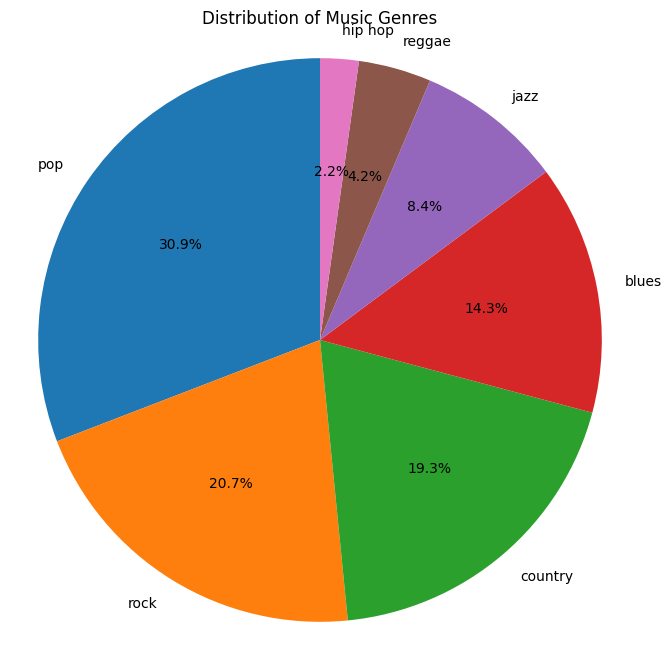

In [ ]:
# Calculate genre distribution
genre_counts = data['genre'].value_counts()

# Plot pie chart for genre distribution
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Music Genres')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Artists

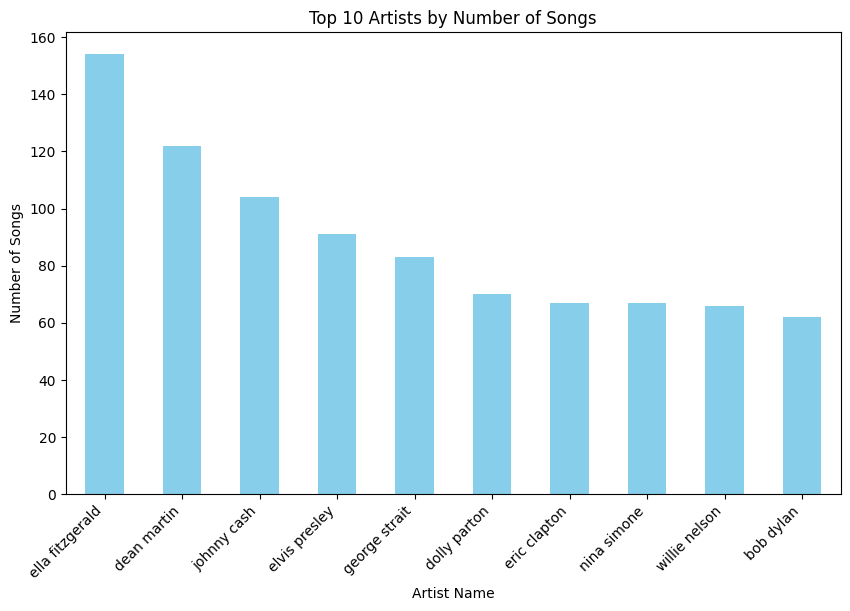

In [ ]:
# Calculate top 10 artists by number of songs
artist_counts = data['artist_name'].value_counts().head(10)

# Plot bar chart for top 10 artists by number of songs
plt.figure(figsize=(10, 6))
artist_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Artist Name')
plt.ylabel('Number of Songs')
plt.xticks(rotation=45, ha='right')
plt.show()

### Releases

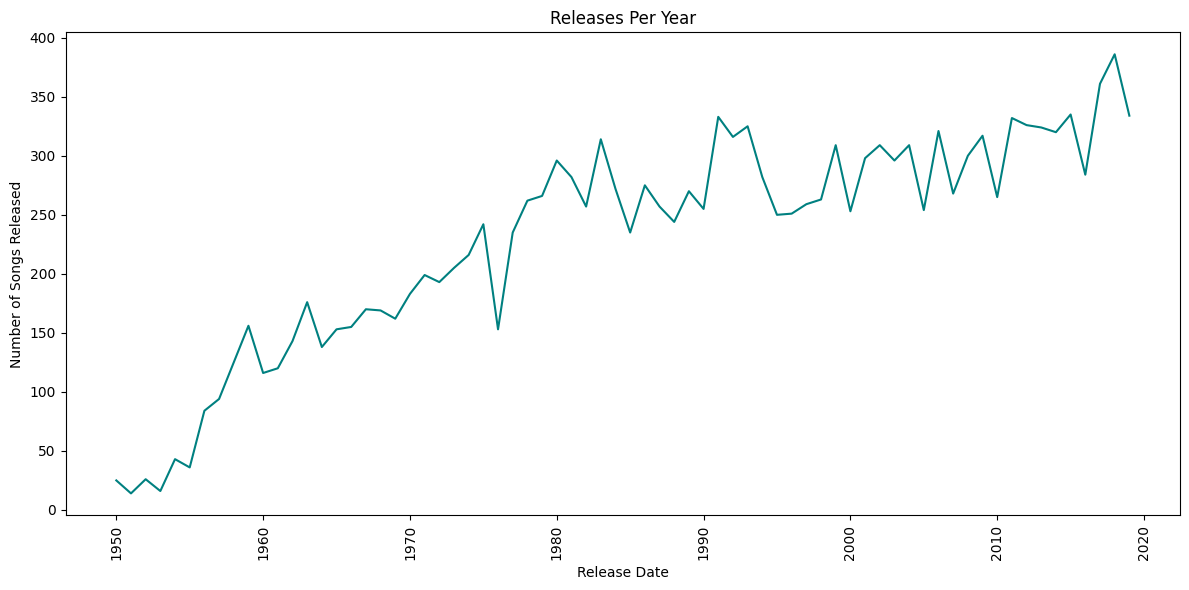

In [ ]:
# Get the unique release dates and count occurrences
release_dates = data['release_date'].unique()

# Create an array to count occurrences for each release date
release_date_counts = {date: (data['release_date'] == date).sum() for date in release_dates}

# Convert the counts into a pandas Series for easier plotting
release_date_counts_series = pd.Series(release_date_counts).sort_index()

# Plot the histogram of release dates and their counts
plt.figure(figsize=(12, 6))
release_date_counts_series.plot(kind='line', color='teal')
plt.title('Releases Per Year')
plt.xlabel('Release Date')
plt.ylabel('Number of Songs Released')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


### Lyrics

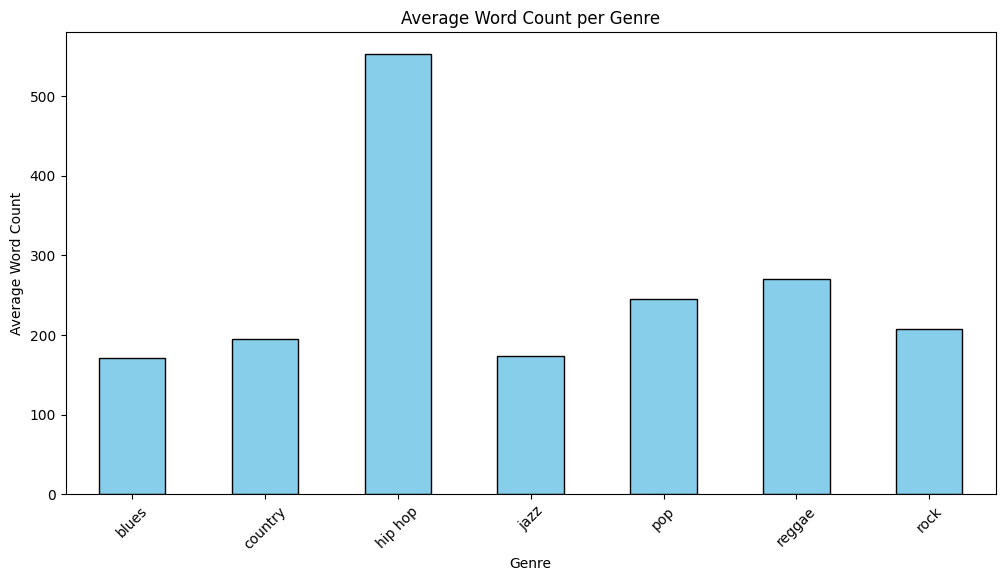

In [ ]:
# Calculate the word count for each song in the 'lyrics_raw' column
data['word_count'] = data['lyrics_raw'].apply(lambda x: len(str(x).split()))

# Calculate the average word count per genre
avg_word_count_by_genre = data.groupby('genre')['word_count'].mean()

# Plot the average word count per genre
plt.figure(figsize=(12, 6))
avg_word_count_by_genre.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Word Count per Genre')
plt.xlabel('Genre')
plt.ylabel('Average Word Count')
plt.xticks(rotation=45)
plt.show()